<a href="https://colab.research.google.com/github/bakkourysalma/DS_2025/blob/main/ML_BAKKOURY_Salma_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
import pandas as pd
import numpy as np

# ---- Import du dataset depuis le lien UCI ----
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df = pd.read_csv(link, header="infer", delimiter=";")

# ---- Informations équivalentes à wine_quality.metadata ----
print("\n========= Dataset summary ========= \n")
df.info()

# ---- Variables équivalentes à wine_quality.variables ----
print("\n========= Variable information ========= \n")
print(df.describe().T)

# ---- Aperçu des premières lignes ----
print("\n========= A few first samples ========= \n")
print(df.head())

# ---- Séparation Features (X) / Target (y) ----
X = df.drop("quality", axis=1)
y = df["quality"]

print("\n========= Wine Qualities ========= \n")
print(y.value_counts())



========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= Variable information ========= 

                       count        mean   

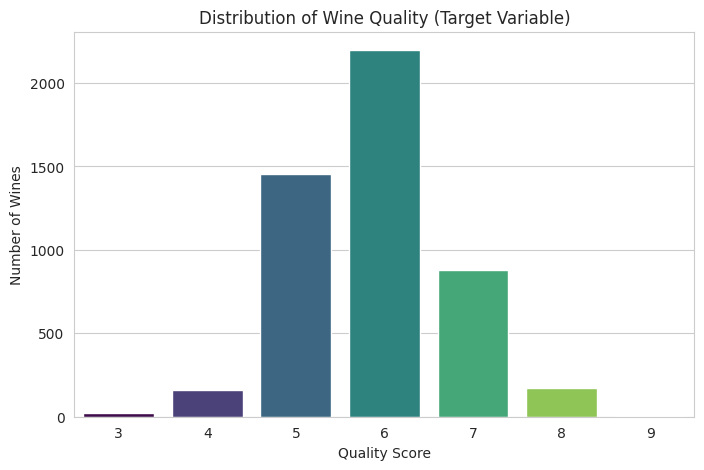

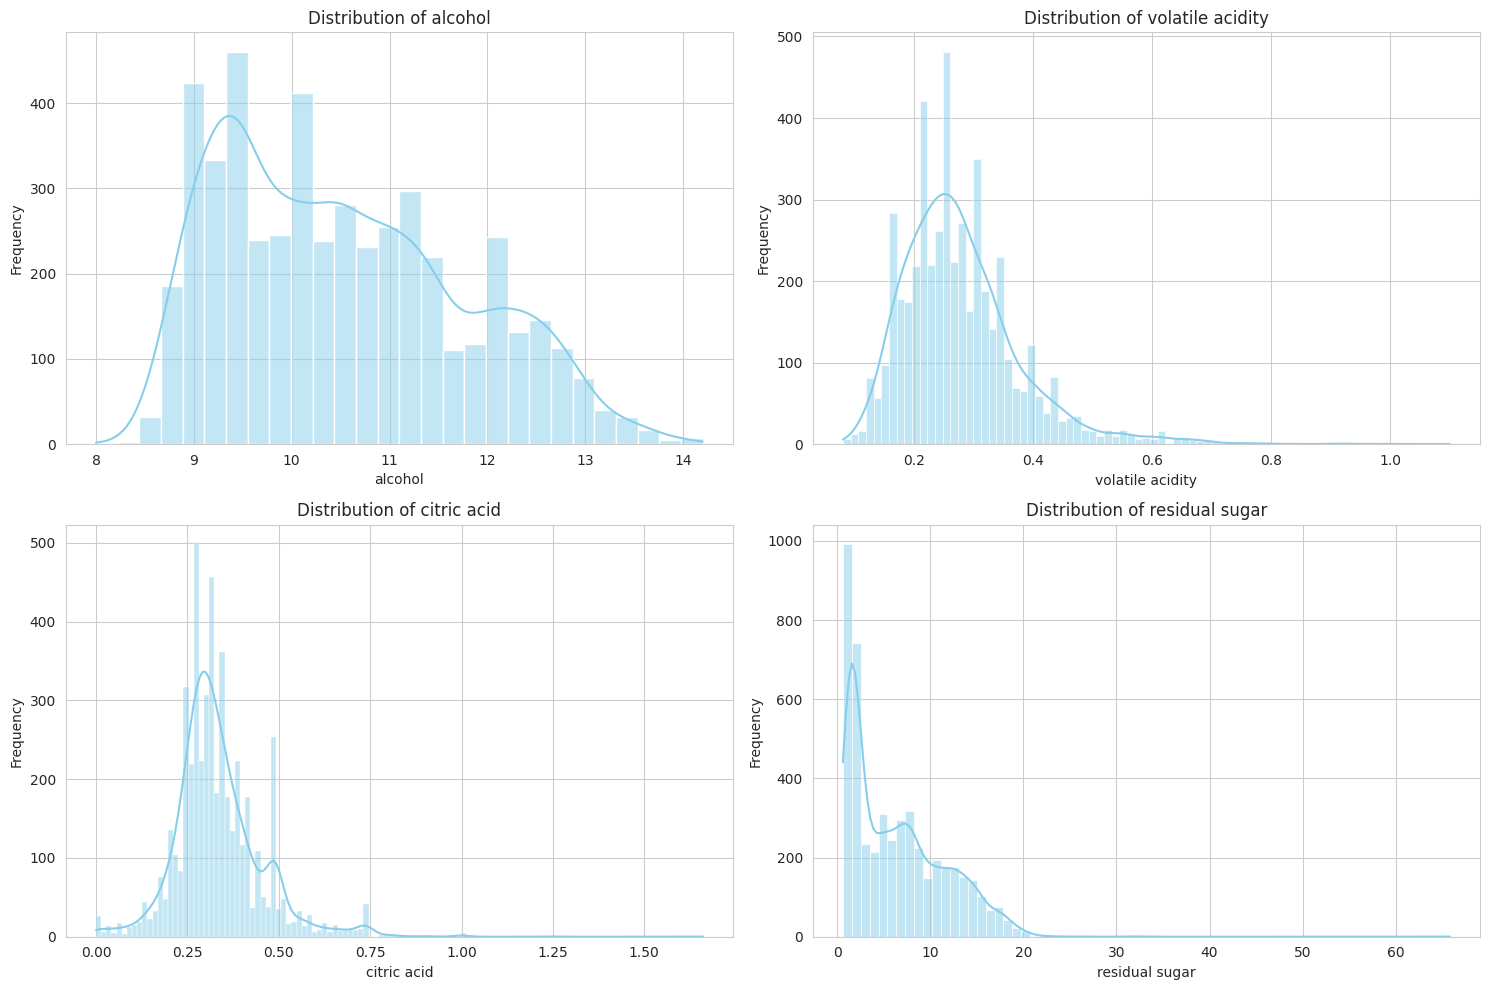

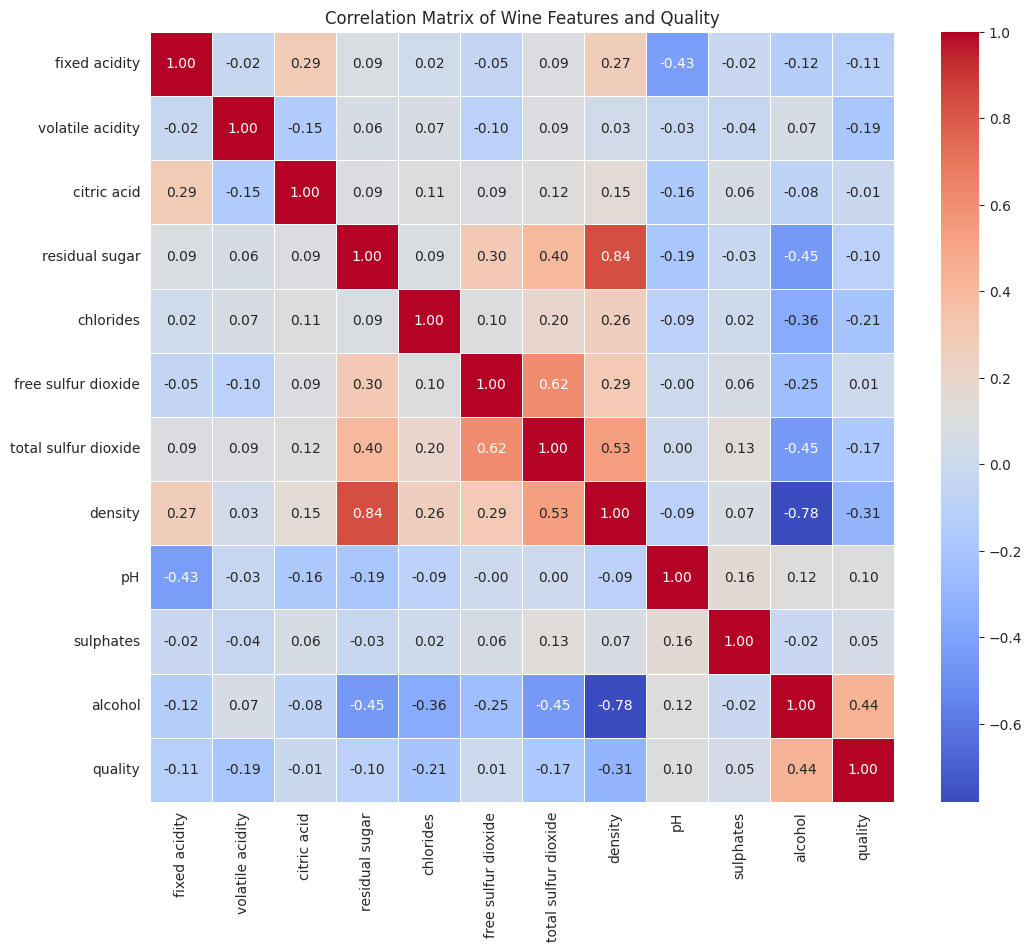

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# 1. Distribution of Wine Quality
plt.figure(figsize=(8, 5))
sns.countplot(x=y, hue=y, palette="viridis", legend=False)
plt.title('Distribution of Wine Quality (Target Variable)')
plt.xlabel('Quality Score')
plt.ylabel('Number of Wines')
plt.show()

# 2. Histograms of selected features
# Let's pick a few features for demonstration
selected_features = ['alcohol', 'volatile acidity', 'citric acid', 'residual sugar']

plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Correlation Matrix Heatmap
# Combine X and y to calculate correlation with quality
df_combined = pd.concat([X, y], axis=1)
corr_matrix = df_combined.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wine Features and Quality')
plt.show()